In [1]:
#!pip install chromedriver_autoinstaller

In [33]:
#!pip install selenium==4.0.0

  Attempting uninstall: selenium
    Found existing installation: selenium 4.3.0
    Uninstalling selenium-4.3.0:
      Successfully uninstalled selenium-4.3.0


In [5]:
#!conda activate se4

In [6]:
#!pip install pandas

In [1]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

import chromedriver_autoinstaller
from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# python 버전 확인
!python --version

Python 3.9.12


In [3]:
# 판다스 버전 확인
pd.__version__

'1.4.2'

In [4]:
#!pip install selenium

In [5]:
# 검색어, 검색 기간 정의
query_txt = input('1.크롤링할 키워드는 무엇입니까?: 정치, 경제, 사회, 생활/문화, IT/과학, 세계')

1.크롤링할 키워드는 무엇입니까?: 정치, 경제, 사회, 생활/문화, IT/과학, 세계경제


In [6]:
query_txt

'경제'

In [7]:
pwd

'C:\\Users\\jeongkpa\\Desktop\\718 (2)'

In [8]:
options = webdriver.ChromeOptions()
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path, options=options)

# 사이트 주소는 네이버
driver.get('http://www.naver.com')
time.sleep(2)  # 2초간 정지

In [9]:
# # Step 2. 네이버 검색창에 "검색어" 검색
# element = driver.find_element_by_id("query")
# element.send_keys(query_txt)  # query_txt는 위에서 입력한 키워드
# element.submit()
# time.sleep(1)

In [10]:
# 'VIEW' 클릭
driver.find_element_by_link_text("뉴스").click( )
time.sleep(1)

In [11]:
# '쿼리' 클릭
driver.find_element_by_link_text(f"{query_txt}").click( )
time.sleep(1)

In [12]:
# 헤드라인 수집
title_list = []

# URL_raw 크롤링 시작
articles = ".cluster_text_headline"
article_raw = driver.find_elements_by_css_selector(articles)
article_raw[0].text

'농식품부, 외식산업에 2026년까지 1조원 투자'

In [13]:
# 밑에 자르기
article_raw = article_raw[:-16]

In [14]:
# 잘 나오는지 검토
for i in range(0, len(article_raw)):
    print(article_raw[i].text)
    title_list.append(article_raw[i].text)

농식품부, 외식산업에 2026년까지 1조원 투자
배달로봇 규제 풀고 서비스 등급제 도입…K-외식산업 키운다
정부, 5년간 외식산업 1조 투입…푸드테크 유니콘 기업 10곳 육성한다
외식산업 키운다…배달로봇 규제 풀고, 외국인 취업 확대
우리·신한 '외환 이상거래'...가상자산거래소 연루 정황
우리·신한 ‘거액 외환 이상거래’…일부자금 가상자산 연루
우리·신한은행, '2조' 외환 이상거래…정말 '환치기'에 이용됐나
우리·신한은행, 외환 이상거래…가상자산거래소 연루 의혹
LH "비상경영 돌입…청렴도·재무건전성 강화 방안 집중 논의"
비상 경영 돌입한 LH “비핵심 사업 폐지”
LH '비상경영체제' 돌입…비핵심사업·유휴자산 민간으로
LH, 비상경영체제 돌입…'부채감축' 주력
폐수 배출 없는 공장의 신·증설 면적 늘린다
산업부, '공장설립 입지규제' 개선 추진…신·증설 쉬워진다
현대차, 창사 이후 첫 4년 연속 임금협상 무파업 타결
현대차, 4년 연속 무분규 임금협상 타결…조합원 61.9% 찬성
서울시-신한카드, 핀테크 스타트업과 혁신사업 모델 개발…11월 우승기업 선정
신한카드, 서울시와 혁신 스타트업 육성…스텝페이 등 7곳 선발


In [15]:
title_list

['농식품부, 외식산업에 2026년까지 1조원 투자',
 '배달로봇 규제 풀고 서비스 등급제 도입…K-외식산업 키운다',
 '정부, 5년간 외식산업 1조 투입…푸드테크 유니콘 기업 10곳 육성한다',
 '외식산업 키운다…배달로봇 규제 풀고, 외국인 취업 확대',
 "우리·신한 '외환 이상거래'...가상자산거래소 연루 정황",
 '우리·신한 ‘거액 외환 이상거래’…일부자금 가상자산 연루',
 "우리·신한은행, '2조' 외환 이상거래…정말 '환치기'에 이용됐나",
 '우리·신한은행, 외환 이상거래…가상자산거래소 연루 의혹',
 'LH "비상경영 돌입…청렴도·재무건전성 강화 방안 집중 논의"',
 '비상 경영 돌입한 LH “비핵심 사업 폐지”',
 "LH '비상경영체제' 돌입…비핵심사업·유휴자산 민간으로",
 "LH, 비상경영체제 돌입…'부채감축' 주력",
 '폐수 배출 없는 공장의 신·증설 면적 늘린다',
 "산업부, '공장설립 입지규제' 개선 추진…신·증설 쉬워진다",
 '현대차, 창사 이후 첫 4년 연속 임금협상 무파업 타결',
 '현대차, 4년 연속 무분규 임금협상 타결…조합원 61.9% 찬성',
 '서울시-신한카드, 핀테크 스타트업과 혁신사업 모델 개발…11월 우승기업 선정',
 '신한카드, 서울시와 혁신 스타트업 육성…스텝페이 등 7곳 선발']

In [16]:
# 첫번째 글의 url 확인
article_raw[0].get_attribute('href')

'https://n.news.naver.com/mnews/article/366/0000828686?sid=101'

In [17]:
# 잘 나오는지 검토
url_list = []
for i in range(0, len(article_raw)):
    print(article_raw[i].get_attribute('href'))
    url_list.append(article_raw[i].get_attribute('href'))

https://n.news.naver.com/mnews/article/366/0000828686?sid=101
https://n.news.naver.com/mnews/article/018/0005272535?sid=101
https://n.news.naver.com/mnews/article/003/0011315490?sid=101
https://n.news.naver.com/mnews/article/025/0003210979?sid=101
https://n.news.naver.com/mnews/article/052/0001766290?sid=101
https://n.news.naver.com/mnews/article/056/0011305479?sid=101
https://n.news.naver.com/mnews/article/015/0004726455?sid=101
https://n.news.naver.com/mnews/article/119/0002622502?sid=101
https://n.news.naver.com/mnews/article/001/0013321105?sid=101
https://n.news.naver.com/mnews/article/020/0003441018?sid=101
https://n.news.naver.com/mnews/article/018/0005271714?sid=101
https://n.news.naver.com/mnews/article/009/0004993320?sid=101
https://n.news.naver.com/mnews/article/448/0000366774?sid=101
https://n.news.naver.com/mnews/article/421/0006229032?sid=101
https://n.news.naver.com/mnews/article/028/0002599289?sid=101
https://n.news.naver.com/mnews/article/029/0002744819?sid=101
https://

In [18]:
url_list

['https://n.news.naver.com/mnews/article/366/0000828686?sid=101',
 'https://n.news.naver.com/mnews/article/018/0005272535?sid=101',
 'https://n.news.naver.com/mnews/article/003/0011315490?sid=101',
 'https://n.news.naver.com/mnews/article/025/0003210979?sid=101',
 'https://n.news.naver.com/mnews/article/052/0001766290?sid=101',
 'https://n.news.naver.com/mnews/article/056/0011305479?sid=101',
 'https://n.news.naver.com/mnews/article/015/0004726455?sid=101',
 'https://n.news.naver.com/mnews/article/119/0002622502?sid=101',
 'https://n.news.naver.com/mnews/article/001/0013321105?sid=101',
 'https://n.news.naver.com/mnews/article/020/0003441018?sid=101',
 'https://n.news.naver.com/mnews/article/018/0005271714?sid=101',
 'https://n.news.naver.com/mnews/article/009/0004993320?sid=101',
 'https://n.news.naver.com/mnews/article/448/0000366774?sid=101',
 'https://n.news.naver.com/mnews/article/421/0006229032?sid=101',
 'https://n.news.naver.com/mnews/article/028/0002599289?sid=101',
 'https://

In [19]:
driver.get("https://n.news.naver.com/mnews/article/001/0013319994?sid=101")

# URL_raw 크롤링 시작
articles = ".go_trans._article_content"
article_raw = driver.find_elements_by_css_selector(articles)
article_raw[0].text

'경실련 분석…"문 정부 때 2배로…MB정부 당시 하락은 분양가상한제 등 영향"\n\n\n"서울 아파트값 18년 전보다 4배 올라…강남-비강남 격차 최대"\n[연합뉴스 자료사진]\n\n\n(서울=연합뉴스) 홍규빈 기자 = 지난 18년간 서울 아파트 한 채 값이 평균 9억원 넘게 상승하면서 4배 가까이 뛰어올랐다는 분석이 나왔다.\n\n경제정의실천시민연합(경실련)은 19일 기자회견을 열고 2004년 1월부터 올해 5월까지 서울 시내 75개 아파트 단지 12만4천 세대의 시세 변동을 분석한 결과를 발표했다. 조사는 KB부동산 시세정보를 활용해 이들 아파트의 3.3㎡(1평)당 가격 평균치를 시점별로 구하는 방식으로 이뤄졌다.\n\n분석 결과에 따르면 30평형 기준으로 2004년 3억4천만원이던 아파트 가격이 올해 5월 12억8천만원으로 약 3.8배 오른 것으로 나타났다.\n\n서울 아파트 시세 및 노동자 연임금 추이\n[경실련 제공. 재판매 및 DB금지]\n\n\n정권별 임기 말 기준으로 살펴보면 노무현 정부(2008년 1월) 때 5억2천500만원으로 올랐고, 이명박 정부(2013년 1월) 때는 4억9천100만원로 하락했다.\n\n박근혜 정부에서 다시 집값이 오르기 시작해 2017년 5월 5억9천900만원을 기록했고, 문재인 정부 임기 말인 올해 5월에는 12억7천800만원으로 2배 넘게 뛰어올랐다.\n\n경실련은 "2010∼2014년 집값 하락 시기는 분양가 상한제가 전면 시행되고 강남·서초의 900만원대 반값아파트와 600만원대 토지임대 건물분양아파트가 공급됐을 때"라며 "반면 지난 5년 동안은 3기 신도시, 공공재개발 등 투기를 조장하는 공급 확대책이 발표될 때마다 아파트값이 상승했다"고 분석했다.\n\n그러면서 "윤석열 정부는 무분별한 규제 완화를 중단하고 공공 역할을 강화해 저렴한 공공주택을 공급해야 한다"며 "선분양제 민간아파트는 분양가 상한제를 전면 의무화하고 후분양제 이행 방안을 제시해야 한다"고 촉구했다.\n\n강남-비강남 아파트 시세 추이\n[경실

In [20]:
# 이미지 크롤링 시작
img_id = "img1"
img_raw = driver.find_element_by_id(img_id)
img_raw.get_attribute('src')

'https://imgnews.pstatic.net/image/001/2022/07/19/PYH2022051709770001300_P4_20220719113817410.jpg?type=w647'

In [21]:
article_raw[0].text.split('\n\n\n')

['경실련 분석…"문 정부 때 2배로…MB정부 당시 하락은 분양가상한제 등 영향"',
 '"서울 아파트값 18년 전보다 4배 올라…강남-비강남 격차 최대"\n[연합뉴스 자료사진]',
 '(서울=연합뉴스) 홍규빈 기자 = 지난 18년간 서울 아파트 한 채 값이 평균 9억원 넘게 상승하면서 4배 가까이 뛰어올랐다는 분석이 나왔다.\n\n경제정의실천시민연합(경실련)은 19일 기자회견을 열고 2004년 1월부터 올해 5월까지 서울 시내 75개 아파트 단지 12만4천 세대의 시세 변동을 분석한 결과를 발표했다. 조사는 KB부동산 시세정보를 활용해 이들 아파트의 3.3㎡(1평)당 가격 평균치를 시점별로 구하는 방식으로 이뤄졌다.\n\n분석 결과에 따르면 30평형 기준으로 2004년 3억4천만원이던 아파트 가격이 올해 5월 12억8천만원으로 약 3.8배 오른 것으로 나타났다.\n\n서울 아파트 시세 및 노동자 연임금 추이\n[경실련 제공. 재판매 및 DB금지]',
 '정권별 임기 말 기준으로 살펴보면 노무현 정부(2008년 1월) 때 5억2천500만원으로 올랐고, 이명박 정부(2013년 1월) 때는 4억9천100만원로 하락했다.\n\n박근혜 정부에서 다시 집값이 오르기 시작해 2017년 5월 5억9천900만원을 기록했고, 문재인 정부 임기 말인 올해 5월에는 12억7천800만원으로 2배 넘게 뛰어올랐다.\n\n경실련은 "2010∼2014년 집값 하락 시기는 분양가 상한제가 전면 시행되고 강남·서초의 900만원대 반값아파트와 600만원대 토지임대 건물분양아파트가 공급됐을 때"라며 "반면 지난 5년 동안은 3기 신도시, 공공재개발 등 투기를 조장하는 공급 확대책이 발표될 때마다 아파트값이 상승했다"고 분석했다.\n\n그러면서 "윤석열 정부는 무분별한 규제 완화를 중단하고 공공 역할을 강화해 저렴한 공공주택을 공급해야 한다"며 "선분양제 민간아파트는 분양가 상한제를 전면 의무화하고 후분양제 이행 방안을 제시해야 한다"고 촉구했다.\n\n강남-비강남 아파트 시세 추이\n[경실련 

In [22]:
# 댓글 크롤링 시작
comment = ".u_cbox_contents"
comment_raw = driver.find_elements_by_css_selector(comment)
comment_raw[-1].text

'그래..전정권에 부동산이 너무 크게 오르니 그때가 정상적이라고 착각들하고 있지만 사실 그때도 거품이 너무 많다고 조정한다고 하다가 잘못된거였지..정확히 따지자면 물가상승 감안하도 당시 부동산 가격이 지금 최고점 점도가 되야 정상일지도 몰라. 다시 말해서 문정권 전 가격에서 최소 30%는 더 빠져야 정상 가격일텐데..지금은 그 때 가격이 되면 싸졌다고 착각하겠지? 그때도 다 거품이라고 했었는데..'

In [23]:
def get_article_content(article_url):
    driver.get(article_url)
    
    comments= []

    # URL_raw 크롤링 시작
    articles = ".go_trans._article_content"
    article_raw = driver.find_elements_by_css_selector(articles)
    # 이미지 크롤링 시작
    img_id = "img1"
    try:
        img_raw = driver.find_element_by_id(img_id)
        img_url = img_raw.get_attribute('src')
    except:
        print("이미지 없음")
        img_url = None
    # 댓글 크롤링 시작
    comment = ".u_cbox_contents"
    comment_raw = driver.find_elements_by_css_selector(comment)
    for c in comment_raw:
        comments.append(c.text)
        
    print('크롤링 완료')
    time.sleep(1)
    return article_raw[0].text , img_url, comments

In [24]:
# 컨텐츠 확인
content_list = []
img_list = []
comment_list= []

for u in url_list:
    content, img_url, comments = get_article_content(u)
    content_list.append(content)
    img_list.append(img_url)
    comment_list.append(comments)
content_list

크롤링 완료
크롤링 완료
크롤링 완료
이미지 없음
크롤링 완료
이미지 없음
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
이미지 없음
크롤링 완료
크롤링 완료
크롤링 완료
이미지 없음
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료


["제3차 외식산업 진흥 기본 계획 발표\n“외식 푸드테크 유니콘 10곳 등 목표”\n9259억원 수준 재원 향후 5년간 투입\n외식산업 혁신·글로벌화·ESG 등 담겨\n\n농림축산식품부가 2026년까지 외식산업의 혁신을 위해 1조원가량을 투자하기로 했다. 농식품부는 20일 이런 내용을 담은 제3차 외식산업 진흥 기본 계획을 발표했다. 이는 외식산업 진흥법에 따라 5년마다 진흥 정책 기본 방향 설정을 위해 수립하는 법정 계획이다.\n\n국내 외식산업은 2020년 기준 사업체수가 80만개에 이르러 전 산업의 13.3% 비중을 차지하고, 매출액 140조원, 종사자수 192만명에 달하는 등 양적 성장을 거듭해왔다. 하지만 산업 구조 영세화, 혁신 미흡 등에 따라 생존률이 낮은 현실이다. 숙박음식점업의 5년 생존률은 20.5%로, 전 산업 31.2%에 크게 못 미친다. 여기에 신종 코로나 바이러스 감염증(코로나19)와 우크라이나 사태로 인한 글로벌 공급망 위기로 최근 경영난까지 가중되는 상황이다.\n\n서울 시내 식당가 모습. /연합뉴스\n\n계획안에 따르면 정부는 향후 5년간 ▲외식 푸드테크 유니콘 기업 10개 ▲매출 1조원 이상 외식기업 5개 ▲외식기업 해외 매장 수 5000개 달성을 목표로 설정했다. 이를 위해 9259억원 수준의 재원을 이 기간 동안 투입할 예정이다.\n\n과제별로 살펴보면, 먼저 외식산업 혁신을 위해 푸드테크 연구개발(R&D)과 상용화 지원에 나선다. 관련 스타트업을 적극 발굴하고, 자금 투자 판로 등을 지원한다는 계획이다. 또 지역별 외식거리에 2024년부터 조리·서빙 로봇, 키오스크 등 스마트 기술을 보급할 계획이다. 데이터와의 접목을 통해 외식업체 경영 개선을 꾀하기 위해 마이데이터 서비스 활성화에도 나선다. 배달로봇 보도 통행을 허용하거나, 현재 한식·중식 등 6개로 제한된 외국 인력 취업 허용 업종을 음식점·주점업 전체로 확대하는 등 규제 개선도 이뤄질 예정이다.\n\n국내 외식산업의 글로벌화도 추진된다. 이를 위해 연 1회 이뤄지는

In [25]:
comment_list

[[],
 [],
 [],
 [],
 [],
 [],
 ['북으로~ 북으로~ 지난 5년을 조사하면 그 핵심이 문재앙과 김정은 핵완수자금? ㅋㅋㅋ',
  '영업 정지 과징금 2조 감사. 위법더러나면 바로. 영업정지. 과징금 환수시켜라',
  '무슨 IMF 시절도 아니고 2조에 은행 영업정지에 과징금에 ㅋㅋㅋㅋㅋ',
  '금감원장이 검사니깐 알아서 잘하겠제 머'],
 [],
 ['나쁜놈들'],
 [],
 ['신도시로 개발될 토지를 미리 알고서 투기를 했던 정신 나간 집단이 아직도 운영된다는 것이 참 어이가 없습니다. 신도시가 될 것을 알고 땅을 사놓는 것을 투자라고 할 수 있습니까? 나라돈을 이용한 사기에 불과합니다. 아직 죗값을 받지 않은 사람들이 많은 것 같은데 제발 뭐라도 좀 하길 기대하겠습니다.'],
 ['혁신에 혁신에 혁신에 뭘 대체 혁신하라는건지 참', '모든 공기업,공공기관 대규모 구조조정해라.'],
 [],
 ['실사하려고 지산 사무실 찾다가 추천으로 지직카라는 카페 가보니 마피,무피 많아요. 급급매로 서울 사무실 얻었어요.'],
 ['국산차구매할필요가없구나귀족노조',
  '파업없이 잘됏다니 다행이네',
  '요즘은 현대차나 수입차나 가격도 별차이 안남 이게 다 귀족노조의 성과임',
  '이런 애들과 대우조선 재하청 근로자와는 상황이 많이 틀리는데 이런 걸 권력자들이 아는지 모르겠네요..',
  '대우야 이런거 본받고대화에 나서라, 오죽하면 스스로 좁은철창에 갖히겠냐?'],
 ['하닉 삼성 신입 연봉 1억인데 현차 신입 성과급 포함해서 6천이다 ㅋ 고만 좀 털어라 ㅋㅋ',
  '역대 최대실적인데 2천 이상 받는게 당연하지 않나요...?삼성 하닉은 거의 4~5천 받는데 현대차라는 외화벌이 애국기업인데 왤케들 뭐라하시지..?',
  '공기업도 아니고 사기업에서 지들끼리 협상한건데 왜들 저리 말이 많냐?',
  '도대체 니들의연봉은얼마가되어야 파업을무기로 임금협상 안할래??'],
 [],
 []]

In [26]:
img_list

['https://imgnews.pstatic.net/image/366/2022/07/20/0000828686_001_20220720111603484.jpg?type=w647',
 'https://imgnews.pstatic.net/image/018/2022/07/20/0005272535_001_20220720110204363.jpg?type=w647',
 'https://imgnews.pstatic.net/image/003/2022/07/20/NISI20220607_0018892328_web_20220607124854_20220720110505377.jpg?type=w647',
 None,
 None,
 'https://imgnews.pstatic.net/image/056/2022/07/20/0011305479_001_20220720100801241.jpg?type=w647',
 'https://imgnews.pstatic.net/image/015/2022/07/20/0004726455_001_20220720082101051.jpg?type=w647',
 'https://imgnews.pstatic.net/image/119/2022/07/20/0002622502_001_20220720104401305.jpeg?type=w647',
 'https://imgnews.pstatic.net/image/001/2022/07/19/AKR20220719133500003_01_i_P4_20220719162915718.jpg?type=w647',
 None,
 'https://imgnews.pstatic.net/image/018/2022/07/19/0005271714_001_20220719214802744.jpg?type=w647',
 'https://imgnews.pstatic.net/image/009/2022/07/19/0004993320_001_20220719132204167.jpg?type=w647',
 None,
 'https://imgnews.pstatic.net

In [27]:
df = pd.DataFrame(data=[title_list, url_list, content_list, img_list, comment_list])

df = df.T

df.columns = (["title_list", "url_list", "content_list", "img_list", "comment_list"])

df

,title_list,url_list,content_list,img_list,comment_list
0,"농식품부, 외식산업에 2026년까지 1조원 투자",https://n.news.naver.com/mnews/article/366/000...,제3차 외식산업 진흥 기본 계획 발표\n“외식 푸드테크 유니콘 10곳 등 목표”\n...,https://imgnews.pstatic.net/image/366/2022/07/...,[]
1,배달로봇 규제 풀고 서비스 등급제 도입…K-외식산업 키운다,https://n.news.naver.com/mnews/article/018/000...,2026년까지 외식산업 9300억원 투자\n소상공인 85% 영세구조 혁신에 방점\n...,https://imgnews.pstatic.net/image/018/2022/07/...,[]
2,"정부, 5년간 외식산업 1조 투입…푸드테크 유니콘 기업 10곳 육성한다",https://n.news.naver.com/mnews/article/003/001...,"기사내용 요약\n농식품부, 2022~2026 외식산업 진흥 기본계획 발표\n조리·서...",https://imgnews.pstatic.net/image/003/2022/07/...,[]
3,"외식산업 키운다…배달로봇 규제 풀고, 외국인 취업 확대",https://n.news.naver.com/mnews/article/025/000...,정부가 외식산업 선도국가로 도약하기 위해 앞으로 5년간 약 9300억원을 투입한다....,None,[]
4,우리·신한 '외환 이상거래'...가상자산거래소 연루 정황,https://n.news.naver.com/mnews/article/052/000...,우리은행과 신한은행 지점에서 발견된 거액의 외환 이상 거래 가운데 일부가 국내 가상...,None,[]
5,우리·신한 ‘거액 외환 이상거래’…일부자금 가상자산 연루,https://n.news.naver.com/mnews/article/056/001...,우리은행 지점 한 곳과 신한은행 지점 두 곳에서 발견된 거액의 외화송금 이상거래 자...,https://imgnews.pstatic.net/image/056/2022/07/...,[]
6,"우리·신한은행, '2조' 외환 이상거래…정말 '환치기'에 이용됐나",https://n.news.naver.com/mnews/article/015/000...,"금감원, 가상자산거래소 관련 확인\n검사 한 달 째…검찰과 공유 강화\n서울의 한 ...",https://imgnews.pstatic.net/image/015/2022/07/...,[북으로~ 북으로~ 지난 5년을 조사하면 그 핵심이 문재앙과 김정은 핵완수자금? ㅋ...
7,"우리·신한은행, 외환 이상거래…가상자산거래소 연루 의혹",https://n.news.naver.com/mnews/article/119/000...,우리 8000억원・신한 1조원대\n거래의혹 드러나면 징계 받나\n신한은행 사옥 ⓒ ...,https://imgnews.pstatic.net/image/119/2022/07/...,[]
8,"LH ""비상경영 돌입…청렴도·재무건전성 강화 방안 집중 논의""",https://n.news.naver.com/mnews/article/001/001...,LH 비상 경영 확대간부회의\n[LH 한국토지주택공사 제공]\n\n\n(서울=연합뉴...,https://imgnews.pstatic.net/image/001/2022/07/...,[나쁜놈들]
9,비상 경영 돌입한 LH “비핵심 사업 폐지”,https://n.news.naver.com/mnews/article/020/000...,공공기관 평가 D등급에 “혁신”\n경영-재무개선 전담TF 신설\n한국토지주택공사(L...,None,[]


In [28]:
import urllib
from urllib import request
from PIL import Image
from io import BytesIO

def print_img(img_url):
    url = img_url
    
    # request.urlopen()
    # HTTP Error 403: Forbidden 에러 때문에 하단의 소스 한 줄을 추가해주었다.
    req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
    res = request.urlopen(req).read()

    # Image open
    urlopen_img = Image.open(BytesIO(res))

    display(urlopen_img)

In [29]:
# 볼드체 사용하기 위한 클래스 선언
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

경제분야의 최신 뉴스를 몇개를 보고 싶으신가요? (18까지 가능)10
1

 농식품부, 외식산업에 2026년까지 1조원 투자


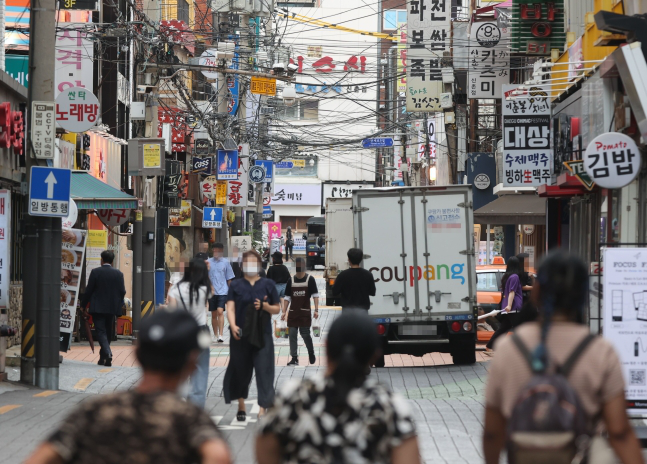



 제3차 외식산업 진흥 기본 계획 발표
“외식 푸드테크 유니콘 10곳 등 목표”
9259억원 수준 재원 향후 5년간 투입
외식산업 혁신·글로벌화·ESG 등 담겨

농림축산식품부가 2026년까지 외식산업의 혁신을 위해 1조원가량을 투자하기로 했다. 농식품부는 20일 이런 내용을 담은 제3차 외식산업 진흥 기본 계획을 발표했다. 이는 외식산업 진흥법에 따라 5년마다 진흥 정책 기본 방향 설정을 위해 수립하는 법정 계획이다.

국내 외식산업은 2020년 기준 사업체수가 80만개에 이르러 전 산업의 13.3% 비중을 차지하고, 매출액 140조원, 종사자수 192만명에 달하는 등 양적 성장을 거듭해왔다. 하지만 산업 구조 영세화, 혁신 미흡 등에 따라 생존률이 낮은 현실이다. 숙박음식점업의 5년 생존률은 20.5%로, 전 산업 31.2%에 크게 못 미친다. 여기에 신종 코로나 바이러스 감염증(코로나19)와 우크라이나 사태로 인한 글로벌 공급망 위기로 최근 경영난까지 가중되는 상황이다.

서울 시내 식당가 모습. /연합뉴스

계획안에 따르면 정부는 향후 5년간 ▲외식 푸드테크 유니콘 기업 10개 ▲매출 1조원 이상 외식기업 5개 ▲외식기업 해외 매장 수 5000개 달성을 목표로 설정했다. 이를 위해 9259억원 수준의 재원을 이 기간 동안 투입할 예정이다.

과제별로 살펴보면, 먼저 외식산업 혁신을 위해 푸드테크 연구개발(R&D)과 상용화 지원에 나선다. 관련 스타트업을 적극 발굴하고, 자금 투자 판로 등을 지원한다는 계획이다. 또 지역별 외식거리에 2024년부터 조리·서빙 로봇, 키오스크 등 스마트 기술을 보급할 계획이다. 데이터와의 접목을 통해 외식업체 경영 개선을 꾀하기 위해 마이데이터 서비스 활성화에도 나선다. 배달로봇 보도 통행을 허용하거나, 현재 한식·중식 등 6개로 제한된 외국 인력 취업 허용 업종을 음식점·주점업 전체로 확대하는 등 규제 개선도 이뤄질 예정이다.

국내 외식산업의 글로벌화도 추진된다. 이를 위해 연 1회 이뤄지는 국가별 외식시장 동향, 

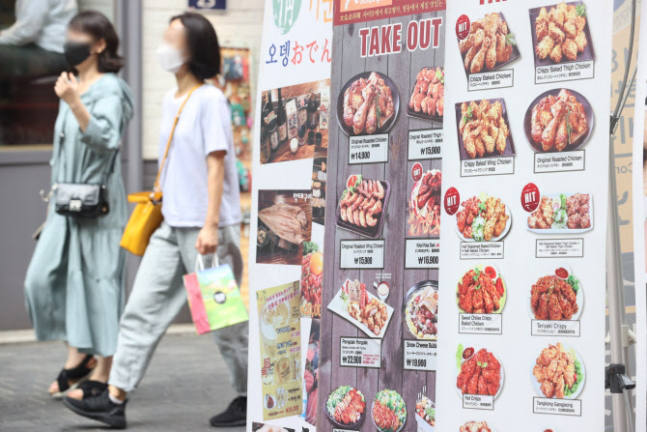



 2026년까지 외식산업 9300억원 투자
소상공인 85% 영세구조 혁신에 방점
"5년내 외식 푸드테크 유니콘 10개"
6일 점심시간 서울의 한 식당가. (사진=연합뉴스)
[세종=이데일리 원다연 기자] 정부가 외식산업 선도국가로 도약하기 위해 5년간 9300억원 규모의 투자에 나선다.

농림축산식품부는 20일 이같은 내용을 담은 ‘외식산업 혁신 플러스 대책(제3차 외식산업 진흥 기본계획)’을 발표했다. 이는 외식산업진흥법에 따라 5년마다 외식산업 진흥 정책의 기본방향 설정을 위해 수립하는 법정계획으로 올해부터 2026년까지의 외식산업 혁신 계획을 담고 있다.

국내 외식산업은 양적 성장을 지속하고 있지만 85% 가량이 소상공인이며, 5년내 생존율이 20.1%에 불과할 정도로 영세한 구조에 머물러 있다. 정부는 글로벌 외식산업을 선도하는 국가로 비전을 정하고 이를 뒷받침하는 규제 개선과 투자에 나선단 계획이다. 향후 5년간 외식 푸드테크 유니콘 기업 10개, 매출 1조원 이상 외식기업 5개, 외식기업 해외 매장수 5000개 달성을 목표로 설정했다.

이를 위해 정부는 외식산업 혁신을 위해 푸드테크 연구와 개발 지원 확대에 나선다. 지역별 음식 특화거리 중 우수지역을 중심으로 조리·서빙로봇, 키오스크 등 푸드테크를 적용한 스마트 외식거리를 조성하고, 청년 창업 인큐베이팅 사업 및 창업 공동체 공간 조성 사업 지원 매장에도 푸드테크 제품 도입을 지원한다.

외식산업의 혁신을 막는 규제 개선도 추진한다. 내년까지 배달로봇의 보도 통행을 위해 지능형로봇법과 도로교통법을 개정하고, 방문취업 자격 외국인의 취업허용 업종은 한식, 외국식 등 음식점업 일부에서 외식업 전체로 확대한다.

국내 외식기업의 세계화도 지원한다. 유망 해외진출 국가에 ‘해외진출 상담데스크’를 운영하고 해외진출 단계별 수요에 맞게 지원 항목을 다양화한다. 또 한류 콘텐츠 등을 활용해 국내 외식브랜드의 해외 인지도를 높이는 한편 내·외국인들이 수준 높고 다양한 외식 서비스를 경험할 수 있도록 2024

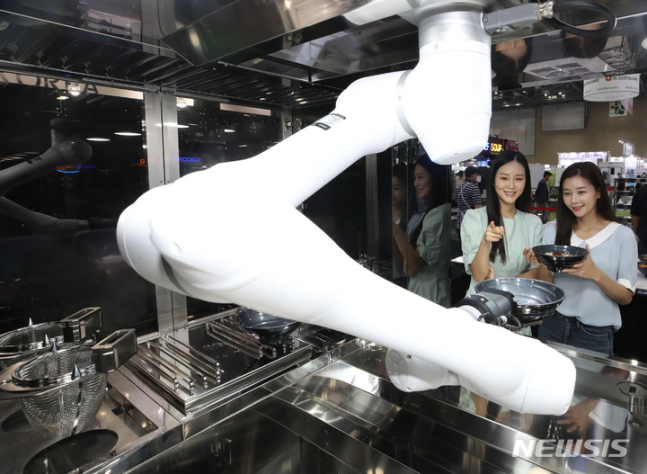



 기사내용 요약
농식품부, 2022~2026 외식산업 진흥 기본계획 발표
조리·서빙·배달로봇 R&D·상용화…혁신 생태계 조성
외식기업 해외 진출 돕고, 영세 업체 근로환경 개선
"5년간 9250억 재원 투자, 미래성장산업 도약 발판"
[고양=뉴시스] 조수정 기자 = 서울국제식품산업대전(서울 푸드 2022) 2022 쌀 가공식품 산업대전이 개막한 7일 오전 경기 고양시 킨텍스 전시장 로보테크 부스에서 음식 자동조리 로봇 시연이 펼쳐지고 있다. 2022.06.07. chocrystal@newsis.com


[세종=뉴시스] 오종택 기자 = 2020년 기준 국내 외식산업은 사업체수 80만개로 지난 2016년(60만개)과 비교해 5년 만에 25%나 늘었다. 사업체 수만 놓고 보면 전 산업의 13.3%를 차지할 만큼 외식산업이 비중이 상당하다. 외식산업은 낮은 진입 장벽과 1인·맞벌이 가구 등 지속적인 수요 증가로 양적 팽창을 해왔으나 내막을 들여다보면 여전히 낙후됐다.

사업체 수만 증가했을 뿐 대부분이 소상공인(84.6%)이다. 종사자 수(192만 명)는 전체 고용의 7.7%이고, 매출액(140조원)은 전 산업의 2.1% 수준에 불과하다. 준비가 부족한 상태에서 창업을 하다 보니 5년 생존율이 20.1%에 불과하다. 새로 문을 연 외식업체 5곳 중 4곳은 5년 이상을 못 버티는 실정이다.

정부가 이처럼 양적 팽창만 거듭하고 있는 외식산업의 혁신과 글로벌 외식산업 선도국가 도약을 위해 향후 5년간 약 1조원을 투입한다.

현재 국내에는 전무한 외식 푸드테크 유니콘 기업 10곳을 육성하고, 매출 1조원 이상 기업 5곳과 해외 매장 수 5000개를 달성하겠다는 목표를 설정했다.

농림축산식품부는 20일 이 같은 내용이 담긴 '외식산업 혁신 플러스 대책'인 제3차(2022∼2026) 외식산업 진흥 기본계획을 발표했다.

이번 계획은 '외식산업 진흥법'에 따라 5년마다 외식산업 진흥 정책의 기본방향 설정을 위해 수립하는 법정계획이다. 연구용역과 외식산업 관계자 및 학계

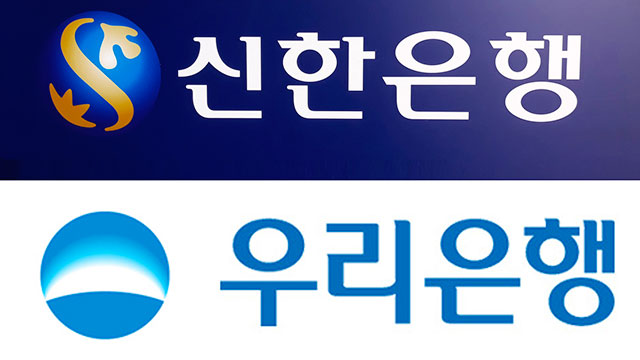



 우리은행 지점 한 곳과 신한은행 지점 두 곳에서 발견된 거액의 외화송금 이상거래 자금 중 일부가 국내 가상자산 투자자금과 관련된 것으로 나타났습니다.

금융감독원은 지난달 착수한 우리은행과 신한은행에 대한 외환 이상거래 수시검사에서 외화송금 자금 일부가 국내 가상자산 투자자금과 관련됐음을 확인했다고 오늘(20일) 밝혔습니다.

우리은행 지점 한 곳의 외환 이상거래 규모는 8천억 원 수준이고, 신한은행 지점 두 곳의 거래 규모는 약 1조 원 수준인 것으로 알려졌습니다.

이와 관련해 금감원은 평소 2주 정도인 수시 검사를 연장해 이들 은행 지점의 외환 이상 거래 현황을 집중적으로 들여다보고 있습니다.

또 이 과정에서 파악된 내용을 금감원 검사가 종료되기 전인 지난주, 검찰에 공유했습니다.

금감원은 이번 수시 검사에서 해당 은행 지점 직원의 자금세탁 방지법 및 외환 거래법 위반 여부도 집중적으로 들여다보고 있습니다.

수입 대금 결제 명목으로 이뤄진 송금이 실제로 물품을 들여오기 위한 송금이었는지, 서류를 위조하거나 가상 자산과 연루돼 차익 거래를 했는지, 중국계 불법성 자본 등과 연루됐는지, 자금세탁 목적이 있는지 등도 점검하고 있습니다.

거액의 외화를 송금하고 물품을 수입하겠다고 신고한 업체는 금괴 수입업체와 반도체 관련 업체들이고, 돈을 보낸 곳은 중국과 일본 등입니다.

금융당국 관계자는 "국내 가상자산 투자자금과의 관련성은 확인이 조금씩 되는 상황"이라면서 "다만 금융당국이 해외 자금까지 추적할 수는 없어서 환치기 여부 등은 단정할 수 없다"고 말했습니다.

한편, 하나은행은 지난 5월 말에 2천억 원대 규모의 외환 거래법 위반으로 금감원으로부터 과징금 5천만 원을 부과받았고, 정릉지점은 업무 일부를 4개월 정지당했습니다.

금융당국 관계자는 "우리은행과 신한은행 지점의 거액 외환 이상 거래가 최근에 문제가 됐던 하나은행 지점 사례와 비슷한 부분이 있는데, 이 또한 단정하긴 어려운 상황"이라고 설명했습니다.

[사진 출처 : 연합뉴스]


댓글

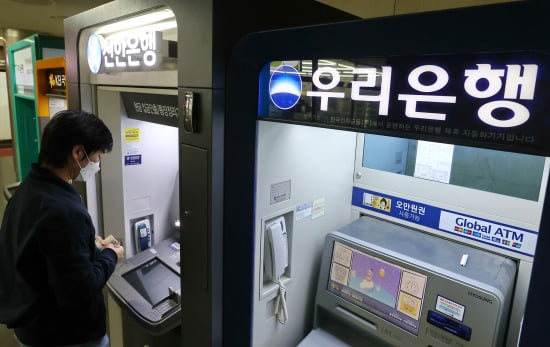



 금감원, 가상자산거래소 관련 확인
검사 한 달 째…검찰과 공유 강화
서울의 한 건물에 설치된 현금인출기/사진=연합뉴스.


우리·신한은행의 거액외환 이상거래 흐름이 심상치않다. 금융감독원은 검사 기간을 연장한데다 거래액 일부가 국내 가상자산거래소와 관련됐음을 확인했다. 대규모 자금이 '환치기'(불법 외환거래)를 통해 자금세탁의 창구로 활용됐을 가능성이 제기되는 가운데 금감원은 검찰과의 정보 공유를 강화 중이다.

20일 금융권에 따르면 금융감독원은 지난달 우리은행, 신한은행에서 연이어 발생한 대규모 외환거래에 대한 수시검사에서 거래액 일부가 국내 가상자산거래소와 관련됐음을 확인했다.

현재까지 파악된 외환 이상거래 규모만 우리은행 8000억원대, 신한은행은 1조원대에 이른다. 당초 2주로 예정됐던 금감원의 검사 기간은 한 달 가까이 진행되고 있다. 금감원은 현재 불법 외환 거래가 의심되는 계좌를 집중적으로 살피고 있으며, 직원의 자금세탁 방지법 및 외환 거래법 위반 여부 등을 확인 중이다.

금융권 일각에선 두 은행이 환치기 세력의 자금 조달 창구로 활용되었을 것이라는 지적이 나온다. 환치기는 외국환은행을 통하지 않고 다른 나라의 통화로 돈을 바꾸는 행위를 뜻한다. 정식으로 외환거래를 하면 환전 수수료를 내고, 자금의 출처를 밝혀야 하지만 환치기를 하면 수수료도 안 내고 자금 출처도 숨길 수 있다.

일부 자금이 가상자산 거래소와 연관된 것으로 확인된 만큼 한국에서 더 비싸게 거래되는 이른바 '김치 프리미엄'을 활용한 환치기에 악용됐을 가능성을 배제할 수는 없는 상황이다. 해외에서 구입한 가상자산을 국내 거래소에서 더 비싼 값에 판 뒤, 환치기 세력들이 거래 차익을 실현하기 위해 은행을 통해 해외로 송금했다는 시나리오다.

서울 영등포구 여의도 금융감독원. 사진=연합뉴스


우리은행과 신한은행은 외환 이상 거래 의혹이 사실로 드러날 경우 강력한 제재를 받는 것이 불가피해 보인다. 앞서 금융당국은 지난 5월 말 외국환거래법을 위반한 하나은행에 대해 과징금 

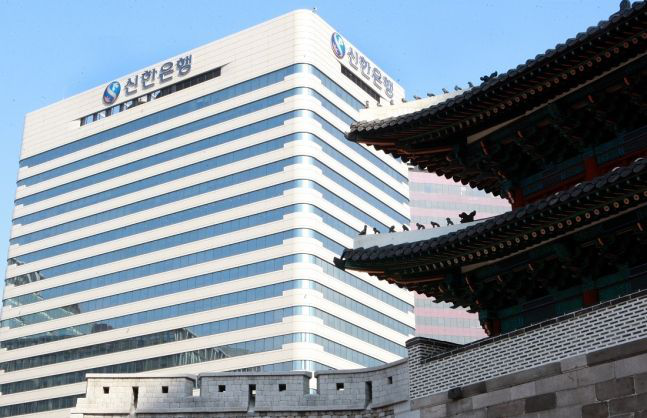



 우리 8000억원・신한 1조원대
거래의혹 드러나면 징계 받나
신한은행 사옥 ⓒ 신한은행
[데일리안 = 이호연 기자] 우리·신한은행의 거액외환 이상거래 흐름이 발견된 가운데, 거래액 일부가 국내 가상자산거래소와 관련된 것으로 확인됐다. 대규모 자금이 ‘환치기(불법 외환거래)’일 가능성이 있어 금융당국의 검사 결과에 이목이 집중되고 있다.

20일 금융권에 따르면 금융감독원은 지난달 우리은행과 신한은행의 지점에서 발생한 거액의 외환 이상 거래에 대해 수시 검사에서, 국내 가상자산거래소와의 연관성을 확인하고 추가 파악중이다.

외환이상 거래액 규모는 우리은행 지점 8000억원, 신한은행 1조원대로 추정된다. 금감원은 불법 외환거래가 의심되는 계좌를 집중적으로 들여다보고 있다. 수입대금 결제 명목으로 이뤄진 결제가 맞는지, 절차상의 문제, 자금 세탁 의혹 등에 초점을 맞추고 검사하는 것으로 알려졌다. 이에 따라 검사 기간도 당초 2주에서 한 달 가까이 진행되고 있다.
금융권에서는 두 은행이 가상자산이 해외보다 국내에서 더 높은 가격에 거래되는 '김치 프리미엄'을 이용한 환치기에 이용된 것 아니냐는 지적이 나온다. 정식으로 외환거래를 하면 환전 수수료를 내고, 자금의 출처를 밝혀야 하지만 환치기를 통해 불법으로 차익을 실현한 것이라는 분석이다.

만약 외환 이상 거래에서 이들 은행의 문제가 사실로 확인되면 강력한 제재를 받을 수도 있다. 실제 하나은행의 경우 지난 5월 말 2000억원대 규모의 외환 거래법 위반으로 금감원으로부터 과징금 5000만원을 부과받았다. 해당 지점은 4개월 업무정지를 당했다.

최근 금융당국은 금융권의 일련의 횡령 사고가 발생하자, 이를 예방하기 위한 내부통제 제도 개선 방안을 강화하겠다고 밝힌 바 있다. 은행권도 이에 따라 내부 외환거래 시스템 등을 정비하고 있다.


댓글없음
url이동: https://n.news.naver.com/mnews/article/119/0002622502?sid=101

9

 LH "비상경영 돌입…청렴도·

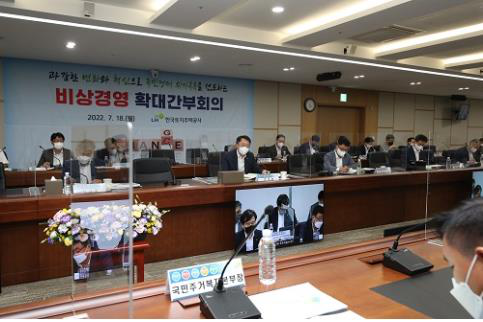



 LH 비상 경영 확대간부회의
[LH 한국토지주택공사 제공]


(서울=연합뉴스) 홍국기 기자 = 한국토지주택공사(LH)는 경영 효율화와 재무 건전성 제고를 위한 비상 경영 체제에 돌입했다고 19일 밝혔다.

LH는 전날 열린 비상 경영 확대간부회의에서 조직 청렴도 제고와 재무 건전성 강화 방안을 집중적으로 논의했다.

또 서민 생계비 부담 완화와 민생 경제 활성화 지원 방안, 국민 눈높이에 맞는 주택공급, 주거복지서비스 제공 등 고객 만족도 제고를 위한 방안도 함께 마련하기로 했다.

LH는 이를 위해 부사장 직속의 전담 조직을 운영하는 동시에 ESG(환경·사회·지배구조) 경영혁신위원회를 통해 혁신 방안 이행 실적을 점검하고 개선 사항을 수시로 발굴할 계획이다.

아울러 LH는 공공기관으로서의 민간 경제 기여와 중소기업과의 동반 성장에도 힘을 싣기로 했다.

LH는 연초에 수립한 계획대로 올해 공공기관 투자 집행 목표 67조원 가운데 43%에 해당하는 29조원을 투입해 민간 경제 활성화 정책을 지원할 계획이라고 전했다.

또 올해 기술 개발 제품을 포함해 약 8조4천억원의 중소기업 제품도 구매할 예정이다.

이 밖에 LH는 2020년 상반기부터 임대료 할인 정책을 시행해 최근까지 약 530억원의 주거비도 지원했다.

또 지난해부터 내년까지 2급 이상 간부 전원의 임금을 동결하고, 올해 임원진 성과급도 전액 반납하기로 한 바 있다.

redflag@yna.co.kr
댓글

나쁜놈들 


url이동: https://n.news.naver.com/mnews/article/001/0013321105?sid=101

10

 비상 경영 돌입한 LH “비핵심 사업 폐지”
[이미지 X]


 공공기관 평가 D등급에 “혁신”
경영-재무개선 전담TF 신설
한국토지주택공사(LH)가 비상경영체제에 돌입한다. 최근 공공기관 평가에서 ‘D등급(미흡)’을 받는 등 강력한 혁신이 시급하다는 판단에서다.

LH는 19일 비상경영 확대간부회의를 개최하고 경영효율화와 재무건전성 제고를 

In [32]:
num = int(input(f"{query_txt}분야의 최신 뉴스를 몇개를 보고 싶으신가요? ({len(content_list)}까지 가능)"))

print('=========================================================')
for i in range(num):
    temp = df.iloc[i]
    print(color.BOLD + f"{i+1}\n\n {temp.title_list}" + color.END)
    try:
        print_img(temp.img_list)
    except:
        print(color.RED + '[이미지 X]' +color.END)
    print(f"\n\n {temp.content_list}")
    if len(temp.comment_list) == 0:
        print(color.BOLD + '\n\n댓글없음'+ color.END)
    else:
        print(color.BOLD +'=================================================\n댓글\n'+ color.END)
        for c in temp.comment_list:
            print(c, '\n\n')
    print(f"url이동: {temp.url_list}")
    print("==================================================\n")